In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

# Task 1: Register and obtain API key from OpenWeatherMap.

In [3]:
# Step 1: Register and obtain API key from OpenWeatherMap
api_key= "b84d8dd46624c53a78044de5f537ace5"

# Task 2: Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.

In [5]:
base_url = "https://api.openweathermap.org/data/2.5/forecast"
city_name = "Landon"

In [6]:
params = {
"q": city_name,
"appid": api_key,
"units": "metric"
}

In [7]:
response = requests.get(base_url, params=params)
data = response.json()

In [8]:
# Check if the response is successful
if response.status_code == 200:
    # Print some relevant information
    print(f"Weather forecast for {city_name}:")


    
    for forecast in data['list']:
        dt = forecast['dt_txt']
        temp = forecast['main']['temp']
        description = forecast['weather'][0]['description']
        print(f"Date & Time: {dt}, Temp: {temp}°C, Weather: {description}")
else:
    print(f"Error: {data['message']}")

Weather forecast for Landon:
Date & Time: 2024-10-30 09:00:00, Temp: 19.99°C, Weather: clear sky
Date & Time: 2024-10-30 12:00:00, Temp: 19.63°C, Weather: clear sky
Date & Time: 2024-10-30 15:00:00, Temp: 23.74°C, Weather: clear sky
Date & Time: 2024-10-30 18:00:00, Temp: 27.36°C, Weather: light rain
Date & Time: 2024-10-30 21:00:00, Temp: 26.13°C, Weather: light rain
Date & Time: 2024-10-31 00:00:00, Temp: 23.38°C, Weather: broken clouds
Date & Time: 2024-10-31 03:00:00, Temp: 22.07°C, Weather: broken clouds
Date & Time: 2024-10-31 06:00:00, Temp: 22.59°C, Weather: broken clouds
Date & Time: 2024-10-31 09:00:00, Temp: 22.89°C, Weather: overcast clouds
Date & Time: 2024-10-31 12:00:00, Temp: 22.96°C, Weather: overcast clouds
Date & Time: 2024-10-31 15:00:00, Temp: 25.84°C, Weather: light rain
Date & Time: 2024-10-31 18:00:00, Temp: 27.22°C, Weather: light rain
Date & Time: 2024-10-31 21:00:00, Temp: 25.87°C, Weather: light rain
Date & Time: 2024-11-01 00:00:00, Temp: 23.19°C, Weather: 

# Task 3: Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response.

In [14]:
# Extract relevant weather attributes and timestamps
weather_data = data["list"]
timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
weather_description = [item['weather'][0]['description'] for item in weather_data]

# Task 4: Clean and preprocess the retrieved data, handling missing values or inconsistent formats.

In [19]:
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

In [21]:
weather_df = pd.DataFrame({
'Timestamp': timestamps,
"Datetime": datetime_objects,
'Temperature': temperatures,
'humidity': humidity,
'wind_speed': wind_speed,
'weather_description': weather_description,})

In [23]:
weather_df.set_index("Datetime", inplace=True)

In [25]:
weather_df = pd.DataFrame({
'Timestamp': timestamps,
"Datetime": datetime_objects,
'Temperature': temperatures,
'humidity': humidity,
'wind_speed': wind_speed,
'weather_description': weather_description,
})

In [27]:
weather_df.set_index("Datetime", inplace=True)

In [29]:
weather_df

,Timestamp,Temperature,humidity,wind_speed,weather_description
Datetime,,,,,
2024-10-30 09:00:00,1730278800,19.99,91,3.24,clear sky
2024-10-30 12:00:00,1730289600,19.63,91,3.16,clear sky
2024-10-30 15:00:00,1730300400,23.74,79,5.03,clear sky
2024-10-30 18:00:00,1730311200,27.36,64,5.53,light rain
2024-10-30 21:00:00,1730322000,26.13,69,5.02,light rain
2024-10-31 00:00:00,1730332800,23.38,85,4.13,broken clouds
2024-10-31 03:00:00,1730343600,22.07,92,3.49,broken clouds
2024-10-31 06:00:00,1730354400,22.59,91,3.79,broken clouds
2024-10-31 09:00:00,1730365200,22.89,90,3.96,overcast clouds


# Task 5: Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

In [32]:
# Calculate total precipitation (rain + snow) for each entry
precipitation = []
for entry in weather_data:
 rain = entry.get("rain", {}).get("3h", 0)
 snow = entry.get("snow", {}).get("3h", 0)
 total_precipitation = rain + snow
 precipitation.append(total_precipitation)


In [34]:
precipitation

[0,
 0,
 0,
 0.13,
 0.16,
 0,
 0,
 0,
 0,
 0,
 0.28,
 0.45,
 0.13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.14,
 0,
 0,
 0,
 0]

In [36]:
# Step 5: Perform data modeling
avg_temp = sum(temperatures) / len(temperatures)
avg_temp

23.20725

In [38]:
max_temp = max(temperatures)
max_temp

27.38

In [40]:
min_temp = min(temperatures)
min_temp

18.6

# Task 6: Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.

In [43]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

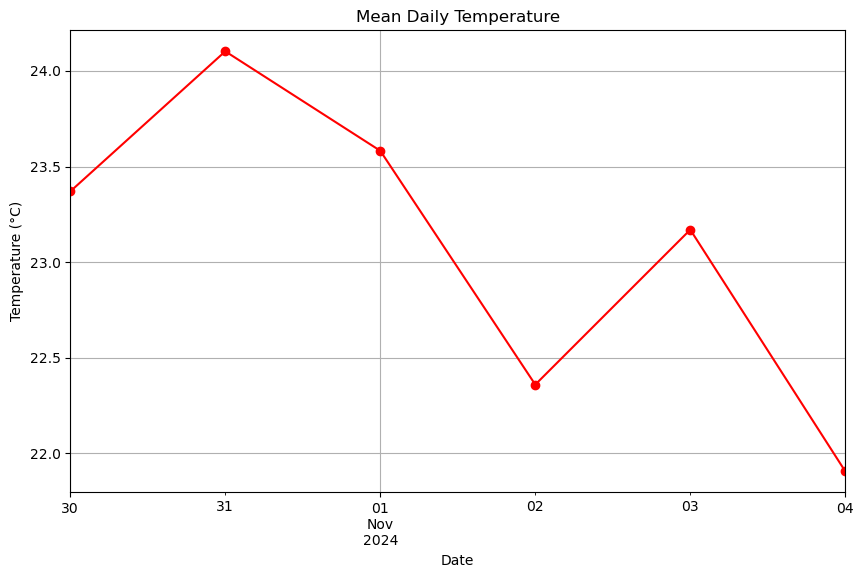

In [45]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Task 7: Apply data aggregation techniques to summarize weather statistics by specific time periods (e.g., daily, monthly, seasonal).

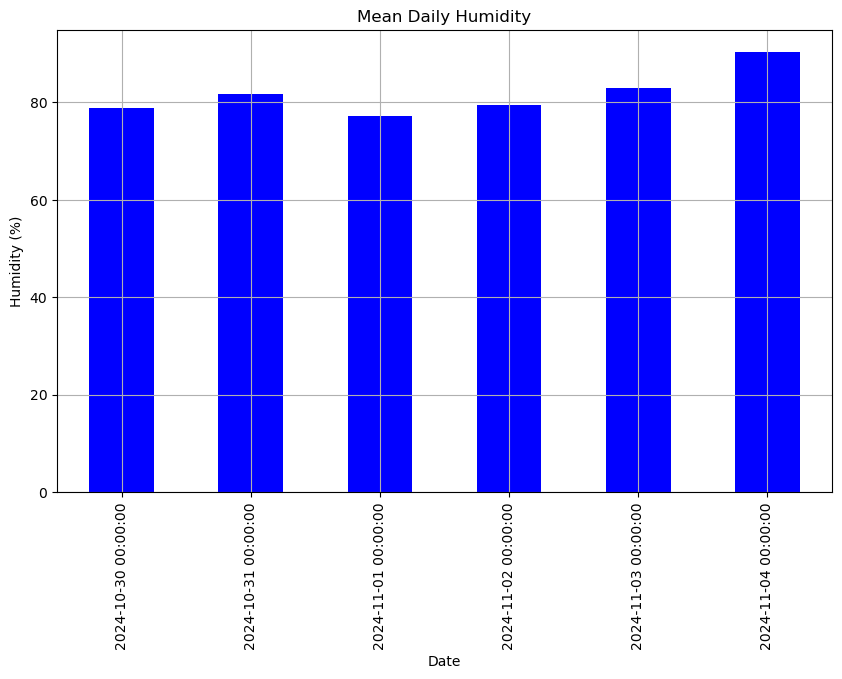

In [47]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

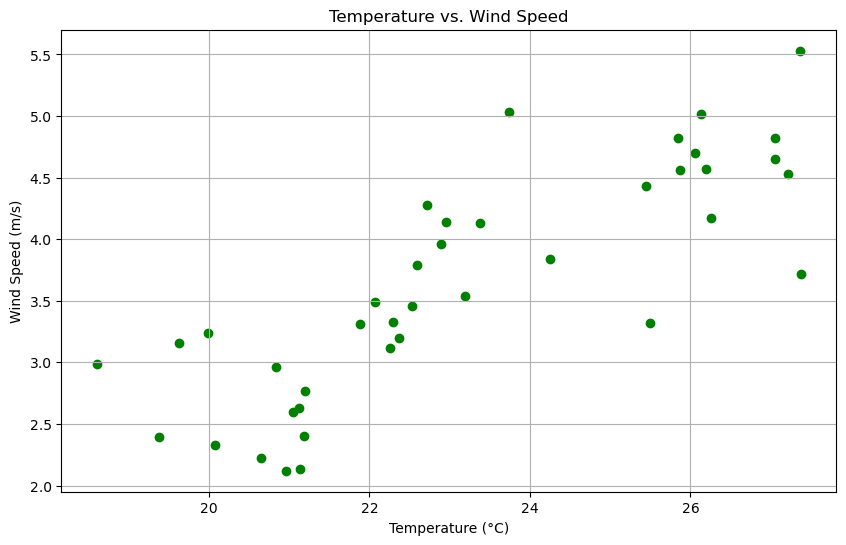

In [43]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Task 8: Incorporate geographical information, if available, to create maps or geospatial visualizations representing weather patterns across different locations.

In [45]:
# Specify the locations for which you want to retrieve weather data
locations = ['London', 'Paris', 'New York']


# Initialize an empty list to store each location's weather data
weather_data = []

In [47]:
# Retrieve weather data for each location
for location in locations:
    # Construct the API URL
    api_url = f'https://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric'



    
    # Make the API request
    response = requests.get(api_url)
    data = response.json()




    
    # Check if the request was successful
    if response.status_code == 200:
        # Extract relevant weather attributes and coordinates
        weather_data.append({
            'Location': location,
            'Temperature': data['main']['temp'],
            'Humidity': data['main']['humidity'],
            'Wind Speed': data['wind']['speed'],
            'Latitude': data['coord'].get('lat'),
            'Longitude': data['coord'].get('lon')
        })
    else:
        print(f"Error retrieving data for {location}: {data['message']}")

In [48]:
# Convert the list of dictionaries into a DataFrame
weather_df = pd.DataFrame(weather_data)

In [51]:
# Display the final DataFrame
print(weather_df)

   Location  Temperature  Humidity  Wind Speed  Latitude  Longitude
0    London        11.89        90        2.06   51.5085    -0.1257
1     Paris        11.60        98        3.09   48.8534     2.3488
2  New York        14.12        92        2.06   40.7143   -74.0060


In [53]:
# Step 8: Incorporate geographical information
# (Geospatial visualization requires additional libraries like Folium)
# Extract latitude and longitude from the current weather data
latitude = data.get("coord", {}).get("lat", 0)
longitude = data.get("coord", {}).get("lon", 0)



# Create a Folium map centered around the city
weather_map = folium.Map(location=[latitude, longitude], zoom_start=10)



# Add markers for each location in the DataFrame
for index, row in weather_df.iterrows():
 location_name = row['Location']
 latitude = row['Latitude']
 longitude = row['Longitude']

    
 # Create a marker and add it to the map
 folium.Marker([latitude, longitude], popup=location_name).add_to(weather_map)

In [55]:
weather_map

# Task 9: Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps

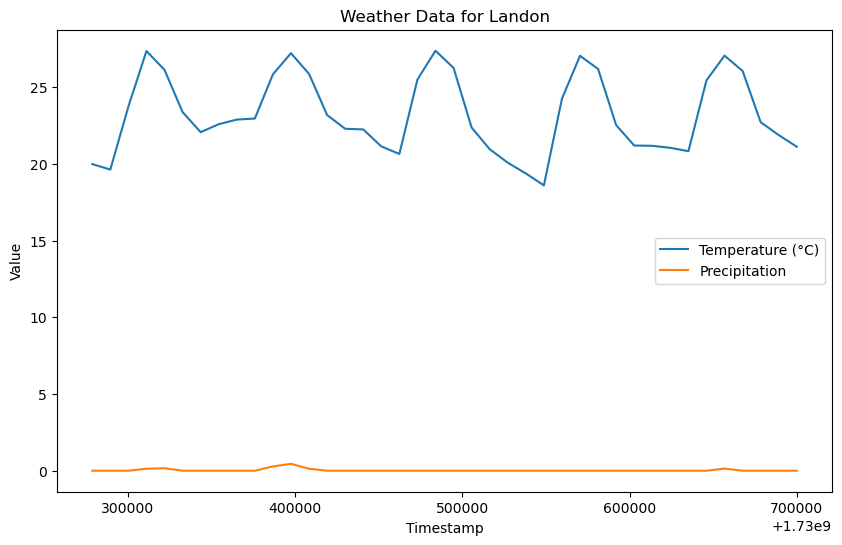

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, label="Temperature (°C)")
plt.plot(timestamps, precipitation, label="Precipitation")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Weather Data for {}".format(city_name))
plt.legend()
plt.show()

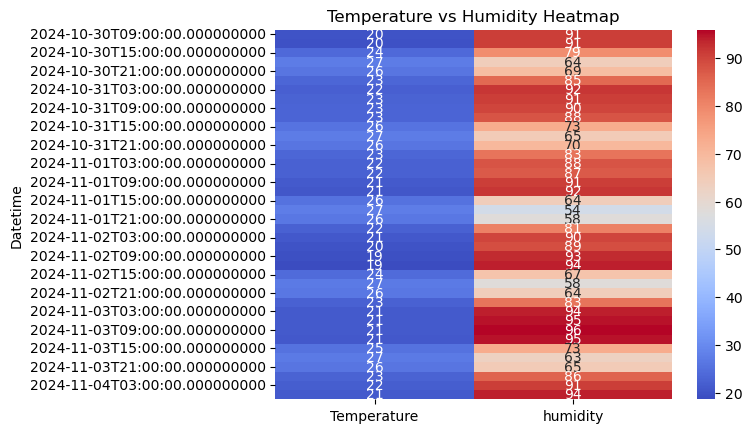

In [52]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

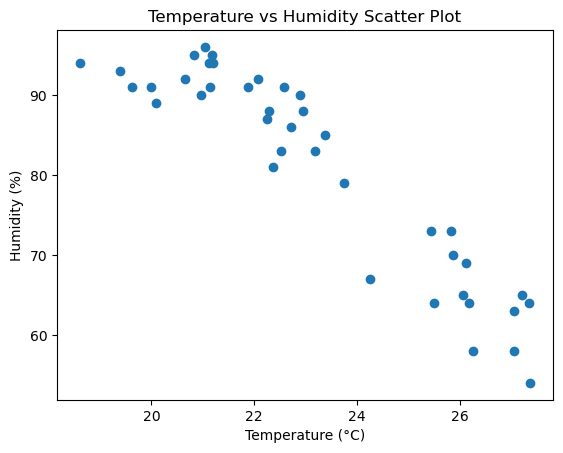

In [54]:
# Create a scatter plot to visualize the relationship between temperature and humid
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()